In [2]:
import pandas as pd
from matplotlib import pyplot as pyplot
import pickle

In [3]:
df = pd.read_csv("./Final_Datset/bangalore_aqi.csv")
df.head()

,City,Date,AQI,AQI_Bucket
0,Bengaluru,01-01-2015,91.0,Satisfactory
1,Bengaluru,02-01-2015,91.0,Satisfactory
2,Bengaluru,03-01-2015,91.0,Satisfactory
3,Bengaluru,04-01-2015,91.0,Satisfactory
4,Bengaluru,05-01-2015,91.0,Satisfactory


In [4]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.dtypes

City                  object
Date          datetime64[ns]
AQI                  float64
AQI_Bucket            object
dtype: object

In [5]:
df.drop(['City','AQI_Bucket'],axis=1,inplace=True)

In [6]:
df.columns = ['ds','y']
df

,ds,y
0,2015-01-01,91.0
1,2015-01-02,91.0
2,2015-01-03,91.0
3,2015-01-04,91.0
4,2015-01-05,91.0
...,...,...
2004,2020-06-27,51.0
2005,2020-06-28,61.0
2006,2020-06-29,65.0
2007,2020-06-30,63.0


In [10]:
from prophet import Prophet
m = Prophet(interval_width=0.95)
training_model = m.fit(df[:1000])

18:17:27 - cmdstanpy - INFO - Chain [1] start processing
18:17:27 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=365,freq='D')

In [12]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,83.012292,-1.899893,163.178818,83.012292,83.012292,-2.715245,-2.715245,-2.715245,-5.376131,-5.376131,-5.376131,2.660885,2.660885,2.660885,0.0,0.0,0.0,80.297047
1,2015-01-02,83.213613,4.210109,164.485969,83.213613,83.213613,1.617511,1.617511,1.617511,-1.309622,-1.309622,-1.309622,2.927133,2.927133,2.927133,0.0,0.0,0.0,84.831125
2,2015-01-03,83.414935,4.834992,167.515900,83.414935,83.414935,6.797819,6.797819,6.797819,3.589919,3.589919,3.589919,3.207900,3.207900,3.207900,0.0,0.0,0.0,90.212754
3,2015-01-04,83.616256,9.911118,175.031763,83.616256,83.616256,7.103171,7.103171,7.103171,3.592151,3.592151,3.592151,3.511020,3.511020,3.511020,0.0,0.0,0.0,90.719427
4,2015-01-05,83.817577,6.499265,168.210329,83.817577,83.817577,5.154925,5.154925,5.154925,1.308479,1.308479,1.308479,3.846446,3.846446,3.846446,0.0,0.0,0.0,88.972502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2018-09-22,67.694277,-38.526099,124.875461,48.209472,86.198016,-18.971466,-18.971466,-18.971466,3.589919,3.589919,3.589919,-22.561386,-22.561386,-22.561386,0.0,0.0,0.0,48.722811
1361,2018-09-23,67.652591,-39.837368,131.446686,48.065689,86.225673,-18.663581,-18.663581,-18.663581,3.592151,3.592151,3.592151,-22.255732,-22.255732,-22.255732,0.0,0.0,0.0,48.989010
1362,2018-09-24,67.610906,-39.269212,123.068814,47.921906,86.253269,-20.517977,-20.517977,-20.517977,1.308479,1.308479,1.308479,-21.826456,-21.826456,-21.826456,0.0,0.0,0.0,47.092929
1363,2018-09-25,67.569220,-30.781953,133.405638,47.778780,86.280806,-22.181734,-22.181734,-22.181734,-0.920248,-0.920248,-0.920248,-21.261485,-21.261485,-21.261485,0.0,0.0,0.0,45.387486


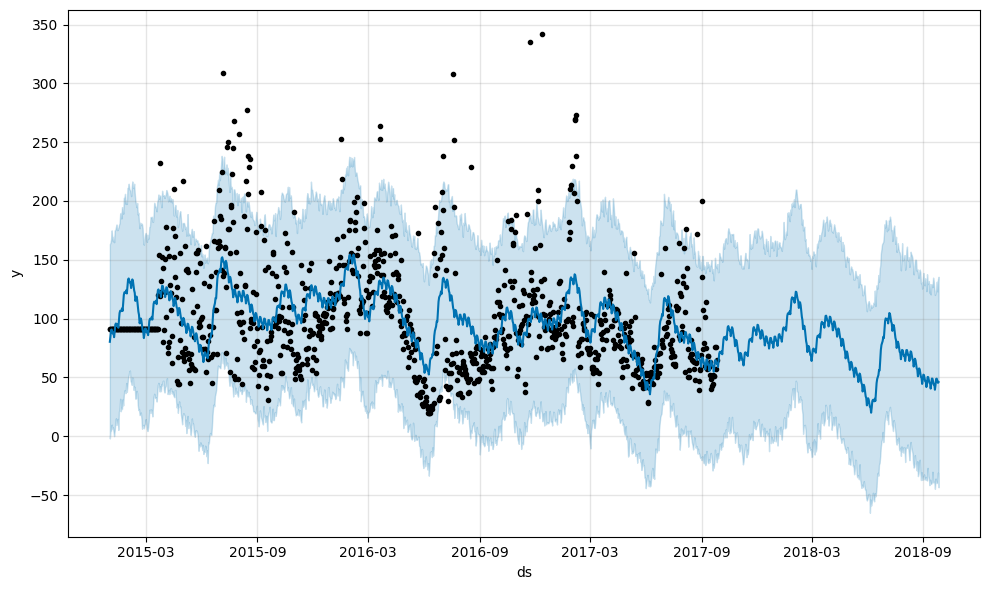

In [13]:
plot1 = m.plot(forecast)

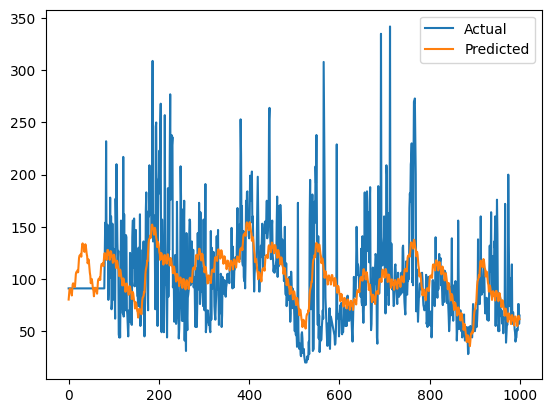

In [15]:
y_true = df['y'][:1000].values
y_pred = forecast['yhat'][:1000].values
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()